<a href="https://colab.research.google.com/github/BusyApe201804930/assessment/blob/main/AssessmentQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10

In [ ]:
(data_train, label_train), (data_test, label_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
# importing necessary modules
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
%matplotlib inline

from keras.utils import np_utils
# layers used in this example
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [ ]:
print('Train: X=%s, y=%s' % (data_train.shape, label_train.shape))
print('Test: X=%s, y=%s' % (data_test.shape, label_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


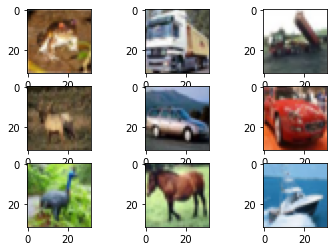

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(data_train[i])
# show the figure
plt.show()

In [ ]:
# one-hot encode the labels
label_train = np_utils.to_categorical(label_train, 10)
label_test = np_utils.to_categorical(label_test, 10)

# print first ten (one hot) training labels
print('One-hot labels: ')
print(label_train[:10])

One-hot labels: 
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
data_train2 = data_train
data_test2 = data_test

In [ ]:
# Some useful parameters for model definition and training
batch_size = 128
num_classes = 10
epochs = 100

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=data_train2.shape[1:], name='1st_Conv2D'),
    tf.keras.layers.MaxPool2D(name='1st_MaxPool2D',strides=2),
    tf.keras.layers.Dense(1000,activation='relu' , name='1st_dense'),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', name='2nd_Conv2D'),
    tf.keras.layers.MaxPool2D(name='2nd_MaxPool2D',strides=2),
    tf.keras.layers.Dense(1000,activation='relu', name='2nd_dense'),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', name='3rd_Conv2D'),
    tf.keras.layers.MaxPool2D(name='3rd_MaxPool2D',strides=2),
    tf.keras.layers.Dense(1000,activation='relu', name='3rd_dense'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(num_classes, activation='softmax', name='final_dense')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_Conv2D (Conv2D)         (None, 32, 32, 32)        2432      
                                                                 
 1st_MaxPool2D (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 1st_dense (Dense)           (None, 16, 16, 1000)      33000     
                                                                 
 2nd_Conv2D (Conv2D)         (None, 16, 16, 32)        800032    
                                                                 
 2nd_MaxPool2D (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 2nd_dense (Dense)           (None, 8, 8, 1000)        3

In [ ]:
import functools
import keras
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)
top5_acc.__name__ = 'top5_acc'

# model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy',top5_acc,top3_acc])

history = model.fit(data_train2, label_train, batch_size=batch_size, epochs=epochs, validation_split=0.25, shuffle=True, steps_per_epoch=50)

Epoch 1/100
50/50 [==============================] - 22s 225ms/step - loss: 2.2962 - accuracy: 0.1298 - top5_acc: 0.5625 - top3_acc: 0.3597 - val_loss: 2.2778 - val_accuracy: 0.1252 - val_top5_acc: 0.5651 - val_top3_acc: 0.3878
Epoch 2/100
50/50 [==============================] - 9s 190ms/step - loss: 2.2570 - accuracy: 0.1623 - top5_acc: 0.6177 - top3_acc: 0.4209 - val_loss: 2.2280 - val_accuracy: 0.1490 - val_top5_acc: 0.6318 - val_top3_acc: 0.4193
Epoch 3/100
50/50 [==============================] - 9s 190ms/step - loss: 2.1949 - accuracy: 0.1852 - top5_acc: 0.6837 - top3_acc: 0.4631 - val_loss: 2.1467 - val_accuracy: 0.2017 - val_top5_acc: 0.7049 - val_top3_acc: 0.4978
Epoch 4/100
50/50 [==============================] - 9s 189ms/step - loss: 2.0826 - accuracy: 0.2317 - top5_acc: 0.7500 - top3_acc: 0.5387 - val_loss: 2.4452 - val_accuracy: 0.1668 - val_top5_acc: 0.5842 - val_top3_acc: 0.3684
Epoch 5/100
50/50 [==============================] - 9s 190ms/step - loss: 1.9821 - accurac

Test accuracy 67.28%


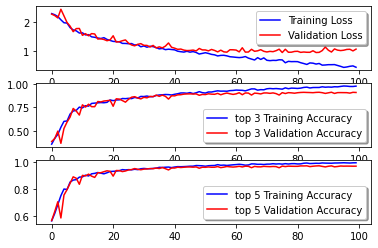

In [ ]:
# evaluate test accuracy
score = model.evaluate(data_test2, label_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy %.2f%%' % accuracy)

fig, ax = plt.subplots(3,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['top3_acc'], color='b', label="top 3 Training Accuracy")
ax[1].plot(history.history['val_top3_acc'], color='r',label="top 3 Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(history.history['top5_acc'], color='b', label="top 5 Training Accuracy")
ax[2].plot(history.history['val_top5_acc'], color='r',label="top 5 Validation Accuracy")
legend = ax[2].legend(loc='best', shadow=True)

50/50 [==============================] - 11s 201ms/step - loss: 2.3164 - accuracy: 0.1194 - top5_acc: 0.5444 - top3_acc: 0.3339 - val_loss: 2.2978 - val_accuracy: 0.1232 - val_top5_acc: 0.5870 - val_top3_acc: 0.3739
Epoch 2/100
50/50 [==============================] - 9s 189ms/step - loss: 2.2588 - accuracy: 0.1389 - top5_acc: 0.6152 - top3_acc: 0.3970 - val_loss: 2.3011 - val_accuracy: 0.1214 - val_top5_acc: 0.5401 - val_top3_acc: 0.3084
Epoch 3/100
50/50 [==============================] - 10s 192ms/step - loss: 2.2325 - accuracy: 0.1705 - top5_acc: 0.6612 - top3_acc: 0.4419 - val_loss: 2.1955 - val_accuracy: 0.1765 - val_top5_acc: 0.6786 - val_top3_acc: 0.4570
Epoch 4/100
50/50 [==============================] - 9s 190ms/step - loss: 2.1424 - accuracy: 0.2117 - top5_acc: 0.7138 - top3_acc: 0.5100 - val_loss: 2.1155 - val_accuracy: 0.2172 - val_top5_acc: 0.7159 - val_top3_acc: 0.5209
Epoch 5/100
50/50 [==============================] - 9s 190ms/step - loss: 1.9976 - accuracy: 0.2633 -

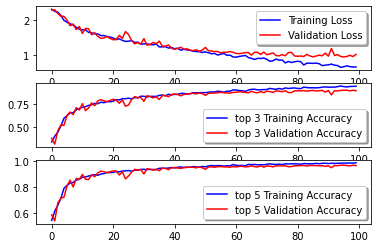

In [ ]:
# p1.3
# add dropout layer
data_train3 = data_train
data_test3 = data_test
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=data_train2.shape[1:], name='1st_Conv2D'),
    tf.keras.layers.MaxPool2D(name='1st_MaxPool2D',strides=2),
    tf.keras.layers.Dense(1000,activation='relu' , name='1st_dense'),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', name='2nd_Conv2D'),
    tf.keras.layers.MaxPool2D(name='2nd_MaxPool2D',strides=2),
    tf.keras.layers.Dense(1000,activation='relu', name='2nd_dense'),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', name='3rd_Conv2D'),
    tf.keras.layers.MaxPool2D(name='3rd_MaxPool2D',strides=2),
    tf.keras.layers.Dense(1000,activation='relu', name='3rd_dense'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax', name='final_dense')
])

model2.summary()

model2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy',top5_acc,top3_acc])

history = model2.fit(data_train3, label_train, batch_size=batch_size, epochs=epochs, validation_split=0.25, shuffle=True, steps_per_epoch=50)

# evaluate test accuracy
score = model2.evaluate(data_test3, label_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy %.2f%%' % accuracy)

fig, ax = plt.subplots(3,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['top3_acc'], color='b', label="top 3 Training Accuracy")
ax[1].plot(history.history['val_top3_acc'], color='r',label="top 3 Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(history.history['top5_acc'], color='b', label="top 5 Training Accuracy")
ax[2].plot(history.history['val_top5_acc'], color='r',label="top 5 Validation Accuracy")
legend = ax[2].legend(loc='best', shadow=True)

In [ ]:
# p1.4
# architectures 1
data_train4 = data_train
data_test4= data_test
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=data_train2.shape[1:], name='1st_Conv2D'),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', name='2nd_Conv2D'),
    tf.keras.layers.MaxPool2D(name='1st2_MaxPool2D',strides=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=data_train2.shape[1:], name='1st2_Conv2D'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', name='2nd2_Conv2D'),
    tf.keras.layers.MaxPool2D(name='1st_MaxPool2D',strides=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax', name='final_dense')
])

model3.summary()

model3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy',top5_acc,top3_acc])


history = model3.fit(data_train4, label_train, batch_size=batch_size, epochs=epochs, validation_split=0.25, shuffle=True, steps_per_epoch=50)

# evaluate test accuracy
score = model3.evaluate(data_test4, label_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy %.2f%%' % accuracy)

fig, ax = plt.subplots(3,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['top3_acc'], color='b', label="top 3 Training Accuracy")
ax[1].plot(history.history['val_top3_acc'], color='r',label="top 3 Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(history.history['top5_acc'], color='b', label="top 5 Training Accuracy")
ax[2].plot(history.history['val_top5_acc'], color='r',label="top 5 Validation Accuracy")
legend = ax[2].legend(loc='best', shadow=True)